#Hey Bruver ! Welcome in House price Prediction ipynb file

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [3]:
df=pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


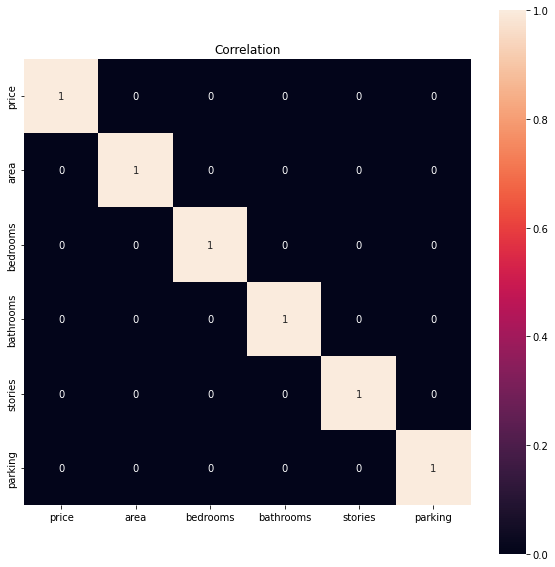

In [5]:
#Correlation
num=df.select_dtypes(exclude='object')
numeric_correlation=num.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(numeric_correlation>0.75, annot=True, square=True)
plt.show()

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Segregating features and corresponding labels

In [7]:
y=df.price
x=df.drop('price',axis=1)

In [8]:
print(x.shape)
x

(545, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
x.dtypes

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

#Converting string attributes into labels

In [10]:
def encode(str):
  if(str=='yes'):
    return 1
  else:
    return 0

In [11]:
# handing mainroad attribute
x['main_road']=x.mainroad.apply(encode)
x.drop('mainroad',axis=1,inplace=True)

# #handing guestroom attribute
x['guest_room']=x.guestroom.apply(encode)
x.drop('guestroom',axis=1,inplace=True)

#handing basement attribute
x['base_ment']=x.basement .apply(encode)
x.drop('basement',axis=1,inplace=True)

#handing hotwaterheating attribute
x['hotwater_heating']=x.hotwaterheating.apply(encode)
x.drop('hotwaterheating',axis=1,inplace=True)

#handing airconditioning  attribute
x['air_conditioning']=x.airconditioning .apply(encode)
x.drop('airconditioning',axis=1,inplace=True)

#handing prefarea  attribute
x['pref_area']=x.prefarea.apply(encode)
x.drop('prefarea',axis=1,inplace=True)

#handing furnishingstatus attribute
x['furnishing_status']=x.furnishingstatus.apply(encode)
x.drop('furnishingstatus',axis=1,inplace=True)




#Feature scaling

In [12]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaling=StandardScaler()
scaling=MinMaxScaler()
y_arr=np.array(y)
y_arr=scaling.fit_transform(y_arr.reshape(-1,1))
# type(y_arr)
y_arr.shape
# Before coverting into series numpy array me Idimensional
y_arr = np.squeeze(y_arr) #numpy.squeeze() removes all dimensions of size 1 from a NumPy array.
y=pd.Series(y_arr)

In [13]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'main_road',
       'guest_room', 'base_ment', 'hotwater_heating', 'air_conditioning',
       'pref_area', 'furnishing_status'],
      dtype='object')

In [14]:
x.dtypes

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
parking              int64
main_road            int64
guest_room           int64
base_ment            int64
hotwater_heating     int64
air_conditioning     int64
pref_area            int64
furnishing_status    int64
dtype: object

In [15]:
print(y.shape)
y

(545,)


0      1.000000
1      0.909091
2      0.909091
3      0.906061
4      0.836364
         ...   
540    0.006061
541    0.001485
542    0.000000
543    0.000000
544    0.000000
Length: 545, dtype: float64

Splitting df into Training and testing format

In [17]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=46)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(436, 12)
(436,)
(109, 12)
(109,)


#Model Training

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)
print("Model has been Succesfully Trained")

Model has been Succesfully Trained


#Testing and Evaluation of models's Performance

Making predictions on testing data

In [19]:
test_pred=model.predict(test_x)
test_pred.shape

(109,)

In [20]:
print(pd.DataFrame({'Actual':test_y, 'Predicted': test_pred}))

       Actual  Predicted
247  0.242424   0.429662
10   0.696970   0.580177
105  0.381818   0.310034
338  0.184848   0.186044
537  0.012121   0.093917
..        ...        ...
503  0.078788   0.102479
135  0.348485   0.432413
304  0.211515   0.325571
385  0.157576   0.085256
529  0.045455   0.182277

[109 rows x 2 columns]


Calculating Error

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"MAE of model's Performance is {mean_absolute_error(test_y,test_pred)}") 
print(f"MSE of model's Performance is {mean_squared_error(test_y,test_pred,squared=True)}")
print(f"RMSE of model's Performance is {mean_squared_error(test_y,test_pred,squared=False)}")

MAE of model's Performance is 0.07678686713887416
MSE of model's Performance is 0.009257368170739244
RMSE of model's Performance is 0.09621521797896238
